In [3]:
import PoseModule
from PoseModule import PoseDetector
import cv2

In [3]:
import importlib
importlib.reload(PoseModule)
from PoseModule import PoseDetector

In [6]:
import cv2
import numpy as np
import time
from PoseModule import PoseDetector 



detector = PoseDetector()

while True:
    img = cv2.imread("dataset/crunch/crunch13.jpg")
    img = detector.find_pose(img)
    lmlist = detector.find_position(img)

    if len(lmlist) != 0:
        pass

    cv2.imwrite("output_crunch13.jpg", img)
    break


In [10]:
import cv2
import numpy as np
import time
from PoseModule import PoseDetector 



detector = PoseDetector()

while True:
    img = cv2.imread("dataset/crunch/crunch13.jpg")
    img = detector.find_pose(img,False)
    lmlist = detector.find_position(img)

    if len(lmlist) != 0:
        # Right shoulder, hips to knee 
        angle = detector.find_angle(img, 12, 24, 26) 
        # Left shoulder. hips to knee 
        angle = detector.find_angle(img, 11, 23, 25) 

    cv2.imwrite("output_crunch13.jpg", img)
    break

In [44]:
import cv2
import os
import csv
from PoseModule import PoseDetector

# Create the output directories if they don't exist
output_dir = "output_squat"
csv_output_dir = "output_csv_squat"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(csv_output_dir, exist_ok=True)

# Initialize pose detector
detector = PoseDetector()

# Path to the input image
image_path = "dataset/squat/20.jpg"
img = cv2.imread(image_path)

# CSV file setup
csv_file = os.path.join(csv_output_dir, "squat_data.csv")
csv_headers = [
    "Image Name", "shoulder_right", "hip_right", "knee_right", "ankle_right",
    "shoulder_left", "hip_left", "knee_left", "ankle_left", "exercise_type"
]

# Ensure the CSV file exists with headers
if not os.path.exists(csv_file):
    with open(csv_file, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(csv_headers)  # Write headers

if img is None:
    print(f"Error: Image at '{image_path}' not found.")
else:
    # Detect pose and landmarks
    img = detector.find_pose(img, draw=False)
    lmlist = detector.find_position(img)

    if lmlist:
        # Calculate angles for right side
        shoulder_right = detector.find_angle(img, 12, 24, 26)
        hip_right = detector.find_angle(img, 24, 26, 28)
        knee_right = detector.find_angle(img, 26, 28, 32)
        ankle_right = detector.find_angle(img, 28, 32, 30)
        
        # Calculate angles for left side
        shoulder_left = detector.find_angle(img, 11, 23, 25)
        hip_left = detector.find_angle(img, 23, 25, 27)
        knee_left = detector.find_angle(img, 25, 27, 31)
        ankle_left = detector.find_angle(img, 27, 31, 29)

        # Define exercise type
        exercise_type = "squat"

        # Print angles for debugging or analysis
        print(f"Right Side Angles: Shoulder={shoulder_right}, Hip={hip_right}, Knee={knee_right}, Ankle={ankle_right}")
        print(f"Left Side Angles: Shoulder={shoulder_left}, Hip={hip_left}, Knee={knee_left}, Ankle={ankle_left}")

        # Save angles to CSV
        with open(csv_file, mode="a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow([
                os.path.basename(image_path),
                shoulder_right, hip_right, knee_right, ankle_right, 
                shoulder_left, hip_left, knee_left, ankle_left, 
                exercise_type
            ])
            print(f"Angles saved to '{csv_file}'.")
    else:
        print("No landmarks detected.")

    # Save the processed image with a unique filename
    image_index = 0
    while True:
        output_path = os.path.join(output_dir, f"output_crunch{image_index}.jpg")
        if not os.path.exists(output_path):  # Ensure unique filenames
            cv2.imwrite(output_path, img)
            print(f"Processed image saved to '{output_path}'.")
            break
        image_index += 1

Right Side Angles: Shoulder=195.24149954963872, Hip=175.46509570776817, Knee=184.9610490140518, Ankle=7.194367672119778
Left Side Angles: Shoulder=164.11246070198308, Hip=186.88167091117072, Knee=178.32285559251065, Ankle=354.2467570419476
Angles saved to 'output_csv_squat\squat_data.csv'.
Processed image saved to 'output_squat\output_crunch20.jpg'.


In [1]:
import cv2
import os
import csv
from PoseModule import PoseDetector

# Create the output directories if they don't exist
output_dir = "output_crunch"
csv_output_dir = "output_csv_crunch"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(csv_output_dir, exist_ok=True)

# Initialize pose detector
detector = PoseDetector()

# Path to the input image
image_path = "dataset/crunch/1.jpg"
img = cv2.imread(image_path)

# CSV file setup
csv_file = os.path.join(csv_output_dir, "crunch_data.csv")
csv_headers = [
    "Image Name", "shoulder_right", "hip_right", "knee_right", "ankle_right",
    "shoulder_left", "hip_left", "knee_left", "ankle_left", "exercise_type"
]

# Ensure the CSV file exists with headers
if not os.path.exists(csv_file):
    with open(csv_file, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(csv_headers)  # Write headers

if img is None:
    print(f"Error: Image at '{image_path}' not found.")
else:
    # Detect pose and landmarks
    img = detector.find_pose(img, draw=False)
    lmlist = detector.find_position(img)

    if lmlist:
        # Calculate right side angles
        shoulder_right = detector.find_angle(img, 12, 24, 26)
        hip_right = detector.find_angle(img, 24, 26, 28)
        knee_right = detector.find_angle(img, 26, 28, 32)
        ankle_right = detector.find_angle(img, 28, 32, 30)
        
        # Calculate left side angles
        shoulder_left = detector.find_angle(img, 11, 23, 25)
        hip_left = detector.find_angle(img, 23, 25, 27)
        knee_left = detector.find_angle(img, 25, 27, 31)
        ankle_left = detector.find_angle(img, 27, 31, 29)

        # Define exercise type
        exercise_type = "crunch"

        # Print angles for debugging or analysis
        print(f"Right Side Angles: Shoulder={shoulder_right}, Hip={hip_right}, Knee={knee_right}, Ankle={ankle_right}")
        print(f"Left Side Angles: Shoulder={shoulder_left}, Hip={hip_left}, Knee={knee_left}, Ankle={ankle_left}")

        # Save angles to CSV
        with open(csv_file, mode="a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow([
                os.path.basename(image_path),
                shoulder_right, hip_right, knee_right, ankle_right,
                shoulder_left, hip_left, knee_left, ankle_left,
                exercise_type
            ])
            print(f"Angles saved to '{csv_file}'.")
    else:
        print("No landmarks detected.")

    # Save the processed image with a unique filename
    image_index = 0
    while True:
        output_path = os.path.join(output_dir, f"output_crunch{image_index}.jpg")
        if not os.path.exists(output_path):  # Ensure unique filenames
            cv2.imwrite(output_path, img)
            print(f"Processed image saved to '{output_path}'.")
            break
        image_index += 1


Right Side Angles: Shoulder=118.55968783939298, Hip=251.91553074669565, Knee=138.60481926552012, Ankle=337.6309494477112
Left Side Angles: Shoulder=106.37896412474522, Hip=240.55650568261277, Knee=129.3076481161066, Ankle=340.18363515950546
Angles saved to 'output_csv_crunch\crunch_data.csv'.
Processed image saved to 'output_crunch\output_crunch20.jpg'.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report

# Load the datasets
squat_data = pd.read_csv('squat_data.csv')
crunch_data = pd.read_csv('crunch_data.csv')



# Select common features
squat_data = squat_data[['shoulder_right', 'hip_right', 'knee_right', 'ankle_right','shoulder_left', 'hip_left' , 'knee_left', 'ankle_left']]
crunch_data = crunch_data[['shoulder_right', 'hip_right', 'knee_right', 'ankle_right','shoulder_left', 'hip_left' , 'knee_left', 'ankle_left']]

# Encode labels: 'squat' -> 0, 'crunch' -> 1
squat_data['exercise_type'] = 0
crunch_data['exercise_type'] = 1

# Combine datasets
combined_data = pd.concat([squat_data, crunch_data], ignore_index=True)

# Features and labels
X = combined_data[['shoulder_right', 'hip_right', 'knee_right', 'ankle_right','shoulder_left', 'hip_left' , 'knee_left', 'ankle_left']]
y = combined_data['exercise_type']

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verify the split
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 28
Testing set size: 12


Logistic Regression Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.57      0.80      0.67         5

    accuracy                           0.67        12
   macro avg       0.69      0.69      0.67        12
weighted avg       0.70      0.67      0.67        12



C:\Users\Renzo\AppData\Local\Temp\ipykernel_22336\1307956560.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


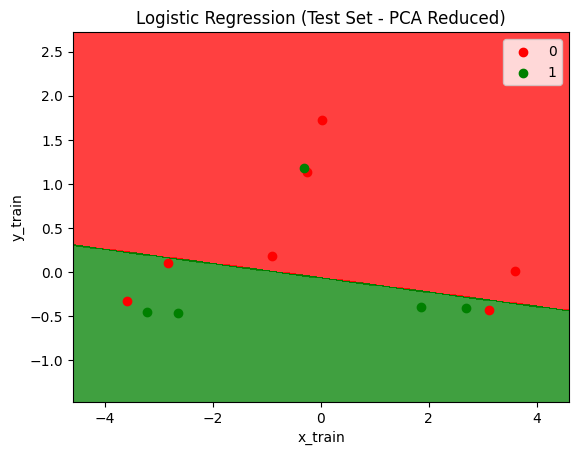

In [47]:
# Apply PCA to reduce to 2 components for plotting
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_pca)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Plot decision boundary
def plot_decision_boundary(classifier, X, y, title, xlabel, ylabel):
    X_set, Y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
    )
    plt.contourf(
        X1,
        X2,
        classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75,
        cmap=ListedColormap(("red", "green")),
    )
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(Y_set)):
        plt.scatter(
            X_set[Y_set == j, 0],
            X_set[Y_set == j, 1],
            c=ListedColormap(("red", "green"))(i),
            label=j,
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot the decision boundary for PCA-reduced data
plot_decision_boundary(
    log_reg,
    X_test_pca,
    y_test,
    title="Logistic Regression (Test Set - PCA Reduced)",
    xlabel="x_train",
    ylabel="y_train",
)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.44      0.80      0.57         5

    accuracy                           0.50        12
   macro avg       0.56      0.54      0.49        12
weighted avg       0.57      0.50      0.47        12



In [53]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12



In [55]:
import joblib


joblib.dump(nb, "naive_bayes_model.pkl")
print("Model saved as naive_bayes_model.pkl")

joblib.dump(log_reg, "logistic_regression_model.pkl")
print("Model saved as logistic_regression_model.pkl")


Model saved as naive_bayes_model.pkl
Model saved as logistic_regression_model.pkl


In [1]:
import cv2
import joblib
import os
from PoseModule import PoseDetector  # Import the updated PoseDetector class

# Function to load a model with error handling
def load_model(filepath):
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"Model file not found: {filepath}")
    try:
        model = joblib.load(filepath)
        print(f"Successfully loaded model: {filepath}")
        return model
    except Exception as e:
        raise RuntimeError(f"Failed to load model from {filepath}. Error: {e}")

# Initialize Pose Detector
detector = PoseDetector()

# Load trained models
try:
    lr_model = load_model("logistic_regression_model.pkl")  # Logistic Regression
    nb_model = load_model("naive_bayes_model.pkl")          # Naive Bayes
except (FileNotFoundError, RuntimeError) as e:
    print(e)

# Define image processing and model prediction
def process_image(image_path, output_path):
    try:
        # Load the image
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Image file not found: {image_path}")

        # Find pose in the image
        img = detector.find_pose(img)

        # Find positions of landmarks
        lmlist = detector.find_position(img)

        # Use PoseModule to predict pose type
        lr_result, nb_result = detector.predict_pose(lmlist, lr_model, nb_model)

        # Display predictions
        print(f"Logistic Regression Prediction: {lr_result}")
        print(f"Naive Bayes Prediction: {nb_result}")

        # Save the processed image
        cv2.imwrite(output_path, img)
        print(f"Processed image saved as '{output_path}'")

        # Display the processed image in the notebook
        from matplotlib import pyplot as plt
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    except FileNotFoundError as fnf_error:
        print(fnf_error)
    except Exception as e:
        print(f"An error occurred: {e}")

# Process a single image
image_path = "dataset/output_crunch/output_crunch0.jpg"
output_path = "output_crunch1.jpg"

process_image(image_path, output_path)

Successfully loaded model: logistic_regression_model.pkl
Successfully loaded model: naive_bayes_model.pkl
Image file not found: dataset/output_crunch/output_crunch0.jpg
